In [1]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

Mounted at Colab_Notebooks


In [2]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive/2020.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

'Entertainment will be critical when cars drive themselves @kimpaquette Just meeting with Larry Ellison to seek some advice. Back working on Tesla end of quarter tomorrow. @richierichhhhh_ Absolutely What should Tesla do with in-car gaming in an autonomous world? @PPathole @WSJ Absolutely @Tesmanian_com Taste of the future Try playing Polytopia in your Tesla! Great game. Multiplayer online version coming soon. @WSJ Focus on making products &amp; services people truly love, so that the total economic pie is bigger, instead of engaging in zero-sum/negative-sum corporate power struggles. This is the good future. @ThatDesignGuy @m_siphiw @moosuraj @Tesla Roughly 95% of parts in Tesla Roadster were unique — not in any other product. Unfortunately, since we started out with the (dumb, in retrospect) goal of simply adapting Lotus Elise to electric, we ended up with a 10% too small sports car that seems kinda like a Lotus. @LaurenRow5 @karpathy Yes @engineers_feed Very important @teslaownersSV

1.Compute word frequencies for each year. Exclude the stop words

In [3]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”', 'We', 'In', 'It', 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


dict_items([('Entertainment', 2), ('critical', 38), ('cars', 222), ('drive', 82), ('kimpaquette', 6), ('Just', 186), ('meeting', 16), ('Larry', 7), ('Ellison', 2), ('seek', 3), ('advice', 8), ('Back', 5), ('working', 94), ('Tesla', 1681), ('end', 84), ('quarter', 14), ('tomorrow', 58), ('richierichhhhh_', 1), ('Absolutely', 33), ('What', 104), ('in-car', 1), ('gaming', 4), ('autonomous', 12), ('world', 105), ('PPathole', 245), ('WSJ', 37), ('Tesmanian_com', 19), ('Taste', 1), ('future', 111), ('Try', 13), ('playing', 15), ('Polytopia', 4), ('Great', 122), ('game', 32), ('Multiplayer', 1), ('online', 29), ('version', 68), ('coming', 142), ('soon', 224), ('Focus', 3), ('making', 55), ('products', 21), ('amp', 1822), ('services', 8), ('people', 237), ('truly', 16), ('love', 94), ('total', 23), ('economic', 5), ('pie', 2), ('bigger', 31), ('instead', 17), ('engaging', 1), ('zero-sum/negative-sum', 1), ('corporate', 5), ('power', 105), ('struggles', 1), ('good', 302), ('ThatDesignGuy', 1), 

2.Show top 10 words (for each year) by the highest value of word frequency



In [4]:
word_analysis.tabulate(10)

           amp          Tesla          https         SpaceX Erdayastronaut            Yes        flcnhvy           http          Model           like 
          1822           1681           1502            634            561            465            424            411            393            376 


3.Plot histogram of word frequencies for each year

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


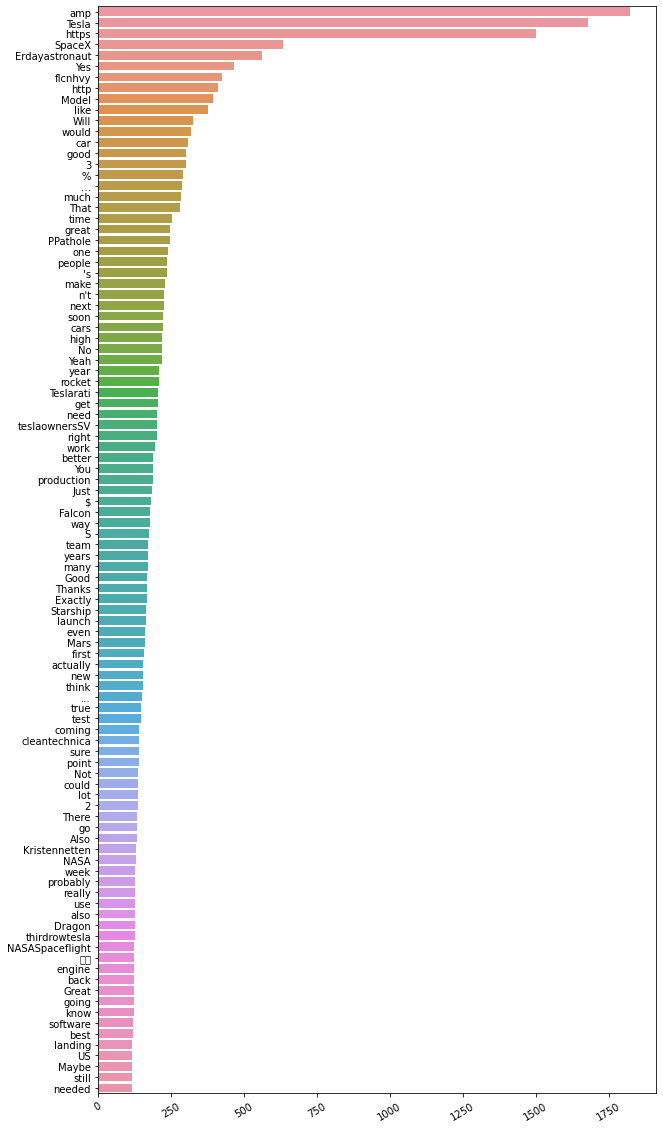

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4.Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

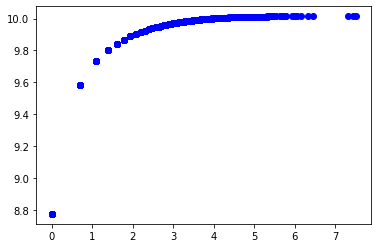

In [6]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')

5.Create bigram network graphs for each year

In [7]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128420 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128059 missing from current font.
  fon

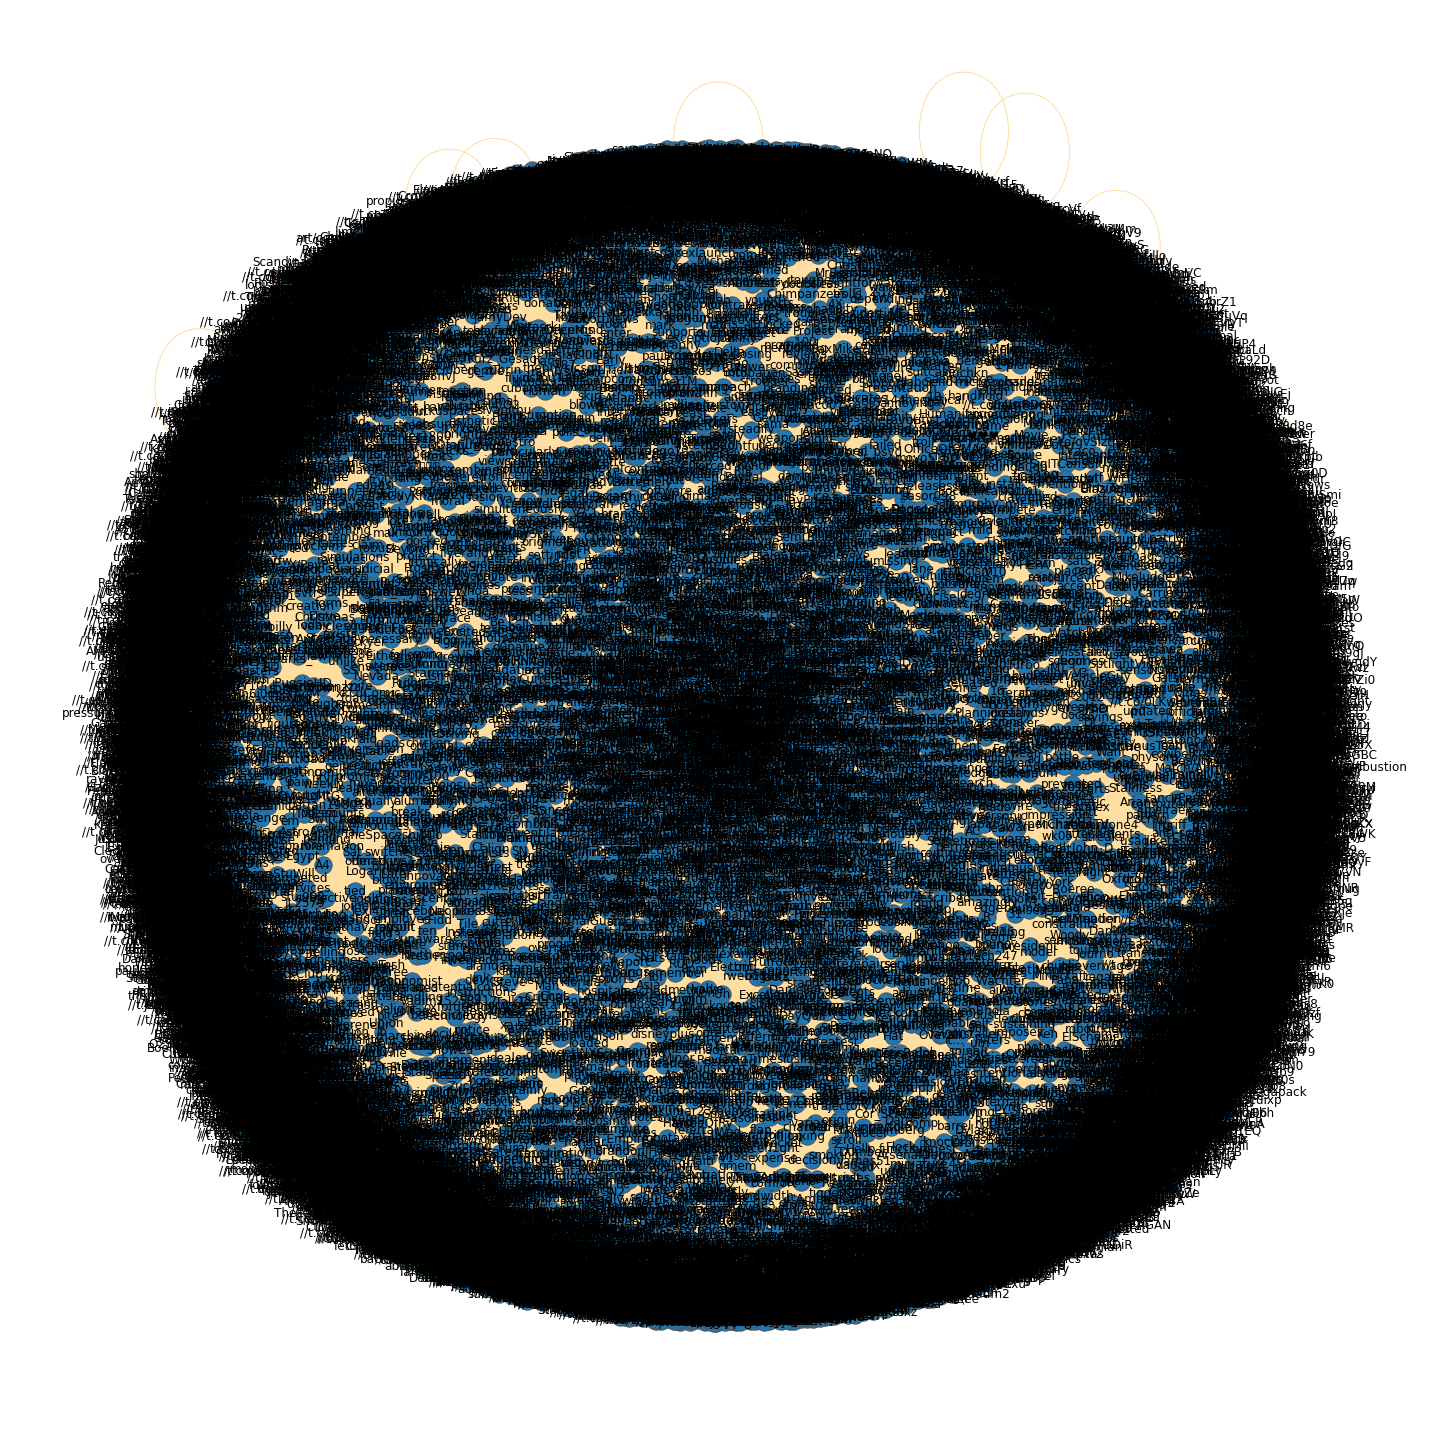

In [8]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()